# Tugas UTS : Processing Data PTA

In [1]:
import numpy as np
import pandas as pd

## Load Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/wahyuarilsaputra/dataset/main/Data_PTA.csv')
df.head()

,NPM,Judul,Abstrak,Prodi,Label
0,40411100468,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,Sistem informasi akademik (SIAKAD) merupaka...,Teknik Informatika,RPL
1,40411100476,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,Berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL
2,40411100480,RANCANG BANGUN APLIKASI PROXY SERVER UNTUKENKR...,Web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL
3,70411100070,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...,Teknik Informatika,komputasi
4,80411100115,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi


## Pre Processing Data

### Processing Data Null



#### Cek Data Null

In [ ]:
df.isnull().sum()

NPM         0
Judul       6
Abstrak    25
Prodi       0
Label      43
dtype: int64

Terdapat 25 data kosong pada abstrak dan 43 data kosong pada Label

#### Hapus Data Null

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

NPM        0
Judul      0
Abstrak    0
Prodi      0
Label      0
dtype: int64

Menghapus data Kosong pada abstrak

#### Cek data not null

In [ ]:
df.count()

NPM        810
Judul      810
Abstrak    810
Prodi      810
Label      810
dtype: int64

Data yang tidak kosong berjumlah 810

#### Cek Jumlah Class Data

In [ ]:
df['Label'].value_counts()

komputasi    573
RPL          198
PBA           39
Name: Label, dtype: int64

#### Grafik data Class

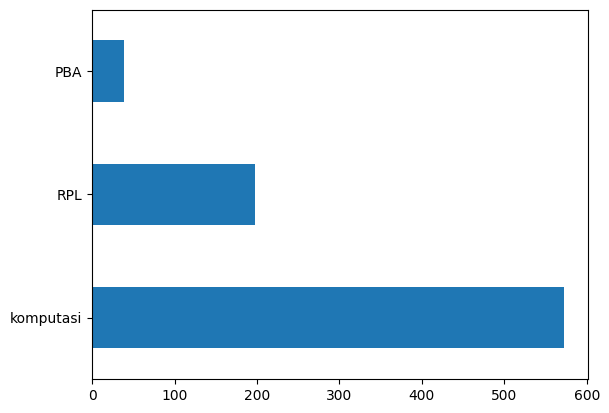

In [ ]:
import matplotlib.pyplot as plt

df['Label'].value_counts().plot(kind='barh')
plt.show()

### Cleaning Text

In [ ]:
import re, string

# Text Cleaning
def cleaning(text):
    # Menghapus tag HTML
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Mengubah seluruh teks menjadi huruf kecil
    text = text.lower()

    # Menghapus spasi pada teks
    text = text.strip()

    # Menghapus Tanda Baca, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    # Menghapus Nomor
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text yang berisi 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [ ]:
df['Abstrak'] = df['Abstrak'].apply(lambda x: cleaning(x))

df.head()

,NPM,Judul,Abstrak,Prodi,Label
0,40411100468,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,sistem informasi akademik siakad merupakan sis...,Teknik Informatika,RPL
1,40411100476,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL
2,40411100480,RANCANG BANGUN APLIKASI PROXY SERVER UNTUKENKR...,web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL
3,70411100070,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,penjadwalan kuliah di perguruan tinggi merupak...,Teknik Informatika,komputasi
4,80411100115,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi


#### Export Data Cleaning

In [ ]:
# Export Hasil Text Cleaning
df.to_csv('PtaCleaning.csv')

### Menghapus Missing Value

In [ ]:
# Ubah string kosong menjadi NaN value
df = df.replace('', np.nan)

In [ ]:
# Cek missing values
df.isnull().sum()

NPM        0
Judul      0
Abstrak    0
Prodi      0
Label      0
dtype: int64

In [ ]:
# Menghapus Missing Value
df.dropna(inplace=True)
len(df)

810

### Menghapus Duplicate Value

In [ ]:
# Menghapus duplikat pada kolom abstrak
df.drop_duplicates(subset=['Abstrak'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom abstrak
df[df['Abstrak'].duplicated()]

,NPM,Judul,Abstrak,Prodi,Label


In [ ]:
# Export Hasil Preprocessing
df.to_csv('preprocessed-pta.csv')

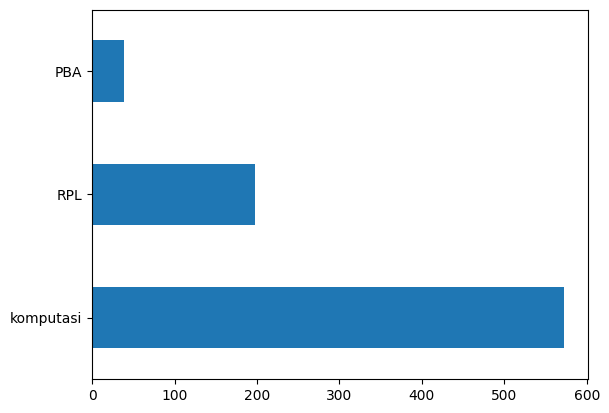

In [ ]:
# Distribusi Kelas setelah Text Preprocessing
df['Label'].value_counts().plot(kind='barh')
plt.show()

### Tokenisasi
Memecah Kalimat Per kata

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

#### Tokenisasi Abstrak

In [ ]:
df['abstrak_tokens'] = df['Abstrak'].apply(lambda x: word_tokenize(x))
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, merupaka..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, den..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, adalah, sebuah, perangkat, lunak..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, di, perguruan, tinggi, m..."
4,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, yang, ada, ..."


### Menghapus Stop Word

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords 
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

#### Stop Word Abstrak

In [ ]:
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, lan..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, perangkat, lunak, server, berfun..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, perguruan, kompleks, per..."
4,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, didunia, mu..."


### Stemming
Mengubah Kata Kerja menjadi Kata Dasar

In [ ]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 8.3 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm
tqdm.pandas()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#### Stemming Abstrak

In [ ]:
df['abstrak_tokens'] = df['abstrak_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/810 [00:00<?, ?it/s]

In [ ]:
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,berjalannya koneksi jaringan komputer dengan l...,"[jalan, koneksi, jaring, komputer, lancar, gan..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, perangkat, lunak, server, berfun..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[jadwal, kuliah, guru, kompleks, masalah, vari..."
4,seiring perkembangan teknologi yang ada diduni...,"[iring, kembang, teknologi, dunia, muncul, tek..."


### Export data Processing

In [ ]:
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: ' '.join(x))

df.to_csv('DataOlah_Pta.csv')

## Load Data Processing

In [2]:
dataOlah = pd.read_csv('https://raw.githubusercontent.com/wahyuarilsaputra/dataset/main/DataOlah_Pta%20(1).csv')
dataOlah = dataOlah.drop(['Unnamed: 0'], axis=1)
dataOlah.head()

,NPM,Judul,Abstrak,Prodi,Label,abstrak_tokens
0,40411100468,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE T...,sistem informasi akademik siakad merupakan sis...,Teknik Informatika,RPL,sistem informasi akademik siakad sistem inform...
1,40411100476,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL,jalan koneksi jaring komputer lancar ganggu ha...
2,40411100480,RANCANG BANGUN APLIKASI PROXY SERVER UNTUKENKR...,web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL,web server perangkat lunak server berfungsimen...
3,70411100070,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,penjadwalan kuliah di perguruan tinggi merupak...,Teknik Informatika,komputasi,jadwal kuliah guru kompleks masalah variabel t...
4,80411100115,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi,iring kembang teknologi dunia muncul teknologi...


## Modeling Data

In [3]:
from sklearn.model_selection import train_test_split

X = dataOlah['abstrak_tokens']
y = dataOlah['Label']

### Ekstraksi Fitur
Menggunakan TF-IDF :
term frequency–inverse document frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(X)

terms = vectorizer.get_feature_names_out()
df_tfidfvect = pd.DataFrame(data = X_tfidf.toarray(),columns = terms)
df_tfidfvect

,aalysis,aam,abad,abadi,abai,abdi,ability,abjad,absah,absensi,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_tfidf.shape

(810, 6443)

In [ ]:
sums = X_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

                 term       rank
5377           sistem  32.387492
1173             data  28.984182
939             citra  28.868784
3609           metode  28.732409
2085            hasil  27.154597
...               ...        ...
2479  jarimenggunakan   0.051211
5904         thinning   0.051211
6365        wireshark   0.040808
264          analyzer   0.040808
5161          seirver   0.040808

[6443 rows x 2 columns]


### PCA
Untuk mereduksi kolom data

In [ ]:
X_tfidf.shape

(810, 6443)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_pca = pca.fit_transform(X_tfidf.toarray())

In [ ]:
X_pca.shape

(810, 10)

Data yang awalnya berukuran 6442 di reduksi menjadi 10 kolom

## Training Data

### Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

### Model KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
model_knn = knn.fit(X_train,y_train)
predictions_knn = model_knn.predict(X_test)

### Model Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
bayes = GaussianNB()
model_bayes = bayes.fit(X_train,y_train)
predictions_bayes = model_bayes.predict(X_test)

## Evaluasi

### Menggunakan KNN

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions_knn))

[[  8   2   8]
 [  1  37  14]
 [  3  14 156]]


In [ ]:
print(metrics.classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

         PBA       0.67      0.44      0.53        18
         RPL       0.70      0.71      0.70        52
   komputasi       0.88      0.90      0.89       173

    accuracy                           0.83       243
   macro avg       0.75      0.69      0.71       243
weighted avg       0.82      0.83      0.82       243



### Menggunakan Naive Bayes

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions_bayes))

[[ 15   2   1]
 [  5  37  10]
 [ 14  42 117]]


In [ ]:
print(metrics.classification_report(y_test,predictions_bayes))

              precision    recall  f1-score   support

         PBA       0.44      0.83      0.58        18
         RPL       0.46      0.71      0.56        52
   komputasi       0.91      0.68      0.78       173

    accuracy                           0.70       243
   macro avg       0.60      0.74      0.64       243
weighted avg       0.78      0.70      0.72       243



### Cek Akurasi Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('KNN')
print('Accuracy score : ', accuracy_score(y_test, predictions_knn))
print('Precision score : ', precision_score(y_test, predictions_knn, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions_knn, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions_knn, average='weighted'))

print('')
print('Naive Bayes')
print('Accuracy score : ', accuracy_score(y_test, predictions_bayes))
print('Precision score : ', precision_score(y_test, predictions_bayes, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions_bayes, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions_bayes, average='weighted'))

KNN
Accuracy score :  0.8271604938271605
Precision score :  0.8227154910310399
Recall score :  0.8271604938271605
F1 score :  0.8231497811744726

Naive Bayes
Accuracy score :  0.6954732510288066
Precision score :  0.7811813802071659
Recall score :  0.6954732510288066
F1 score :  0.7152618953244548


## Export Model

In [ ]:
from joblib import dump

dump(model_knn, filename="model_knn.joblib")
dump(model_bayes, filename="model_bayes.joblib")
dump(vectorizer, filename="vectorizer_model_abstrak.joblib")

['vectorizer_model_abstrak.joblib']